In [ ]:
from langchain_ollama.chat_models import ChatOllama
llm = ChatOllama(model="mistral")

In [2]:
########################

In [2]:
from langgraph.graph import MessagesState,StateGraph, END, START
from langchain_core.messages import HumanMessage, SystemMessage
from langchain_community.tools import DuckDuckGoSearchRun
from langgraph.prebuilt import tools_condition # this is the checker for the if you got a tool back
from langgraph.prebuilt import ToolNode
from IPython.display import Image, display
from typing import Annotated, TypedDict
import operator
from langchain_core.messages import AnyMessage
from langgraph.graph.message import add_messages
from langgraph.prebuilt import tools_condition # this is the checker for the
from langgraph.prebuilt import ToolNode

In [3]:
def celsius_to_fahrenheit(temp_c: float) -> float:
    """
    Convert Celsius to Fahrenheit.
    Args:
        temp_c: temperature
    """
    return (temp_c * 9/5) + 32

In [4]:
def kilometers_to_miles(km: float) -> float:
    """Convert kilometers to miles.

    Args:
        km: kilometers
    """
    return km * 0.621371

In [5]:
def kilograms_to_pounds(kg: float) -> float:
    """Convert kilograms to pounds.

    Args:
        kg: kilograms
    """
    return kg * 2.20462

In [6]:
search = DuckDuckGoSearchRun()

In [ ]:
# !pip install -U duckduckgo-search


[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
tools = [celsius_to_fahrenheit, kilometers_to_miles, kilograms_to_pounds , search]

In [8]:
llm_with_tools=llm.bind_tools(tools)

In [9]:
# System message
sys_msg = SystemMessage(content="You are a helpful assistant tasked with using search and performing Unit conversions on a set of inputs.")
     

In [10]:
def reasoner(state: MessagesState):
   return {"messages": [llm_with_tools.invoke([sys_msg] + state["messages"])]}

In [11]:
# Graph
builder = StateGraph(MessagesState)

# Add nodes
builder.add_node("reasoner", reasoner)

builder.add_node("tools", ToolNode(tools)) # for the tools

# Add edges
builder.add_edge(START, "reasoner")

builder.add_conditional_edges(
    "reasoner",
    # If the latest message (result) from node reasoner is a tool call -> tools_condition routes to tools
    # If the latest message (result) from node reasoner is a not a tool call -> tools_condition routes to END
    tools_condition,
)

builder.add_edge("tools", "reasoner")
react_graph = builder.compile()

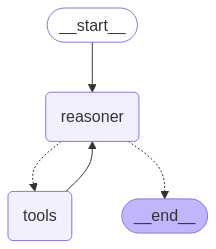

In [12]:
# Display the graph
display(Image(react_graph.get_graph(xray=True).draw_mermaid_png()))

In [34]:
messages = [HumanMessage(content="What is the weight of Elon Musk in Kilograms and Pounds?")]

In [35]:
messages = react_graph.invoke({"messages": messages})

In [36]:
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

What is the weight of Elon Musk in Kilograms and Pounds?
================================== Ai Message ==================================
Tool Calls:
  duckduckgo_search (711f6e4d-bb8e-4570-b444-a51dabdbbdca)
 Call ID: 711f6e4d-bb8e-4570-b444-a51dabdbbdca
  Args:
    query: Elon Musk weight
  kilograms_to_pounds (0c8683fe-b20c-40c5-9e4b-f9c2d9aace49)
 Call ID: 0c8683fe-b20c-40c5-9e4b-f9c2d9aace49
  Args:
    kg: 165
================================= Tool Message =================================
Name: duckduckgo_search

Elon Musk achieved a massive weight loss transformation, and he wasn't shy about how he did it. Before we get into how he achieved it, let's take a look at what might have been his biggest motivation. In the summer of 2022, photos of Elon Musk vacationing on a yacht in Mykonos, Greece surfaced on the internet. Learn about the billionaire entrepreneur's physical attributes, personal life, a

In [43]:
messages = [HumanMessage(content="What is the distance between India and Russia in kilometers and miles?")]

In [44]:
messages = react_graph.invoke({"messages": messages})

In [45]:
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

What is the distance between India and Russia in kilometers and miles?
================================== Ai Message ==================================
Tool Calls:
  duckduckgo_search (51bb4ff6-41b1-4581-9124-3e405ea7ba26)
 Call ID: 51bb4ff6-41b1-4581-9124-3e405ea7ba26
  Args:
    query: Distance between India and Russia
  kilometers_to_miles (9cc028c2-c5bc-447e-9792-dd9df135af42)
 Call ID: 9cc028c2-c5bc-447e-9792-dd9df135af42
  Args:
    km: 5469
  duckduckgo_search (5a435fbb-0fca-492c-b521-68d4cf137e73)
 Call ID: 5a435fbb-0fca-492c-b521-68d4cf137e73
  Args:
    query: Distance between India and Russia
  kilometers_to_miles (c518ca0c-c6af-4de3-a815-7a70c1fbc567)
 Call ID: c518ca0c-c6af-4de3-a815-7a70c1fbc567
  Args:
    km: 5469
================================= Tool Message =================================
Name: duckduckgo_search

There exists a geographic point where two of the largest countries in th